In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import statsmodels.api as sm

In [2]:
mergedf = pd.read_csv("mergedf_final-1.csv")

In [3]:
mergedf =  mergedf[mergedf["Funding"] != 0]

In [4]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(mergedf, test_size=0.33)

In [5]:
train, validate = train_test_split(train, test_size = 0.33)

In [6]:
print train.shape, validate.shape, test.shape

(2212, 39) (1090, 39) (1627, 39)


In [104]:
# First we use scores as our dependent variable
# variables
X_train = train[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_train_score = train['Mean_Scale_Score']
X_validation = validate[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_validation_score = validate['Mean_Scale_Score']
X_test = test[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_test_score = test['Mean_Scale_Score']

In [105]:
y_train_score

4523    672
4498    671
1167    675
1392    649
4047    694
2838    673
1985    664
4620    663
1621    665
891     652
4611    683
1527    658
951     644
1590    673
4921    673
4752    688
1505    659
3964    693
1107    693
3096    663
4143    692
2444    688
254     693
991     652
3196    701
3991    706
2168    668
3127    656
969     664
4065    692
       ... 
3138    681
1812    658
1838    685
4031    701
1799    674
1940    661
4428    695
4262    677
4330    696
1683    666
3814    654
3078    703
2393    674
4059    709
270     679
3605    683
3404    672
4356    685
1573    666
1183    661
4623    676
4319    676
4388    700
445     654
906     689
2243    649
4579    698
2251    664
4785    697
438     654
Name: Mean_Scale_Score, dtype: int64

In [8]:
# Define a function to calculate the RMSE score
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

In [9]:
# Now try five different models on the train set and select the best one in terms of RMSE score
# OLS
ols = sm.OLS(y_train_score, X_train).fit()
y_ols_pred = ols.predict(X_validation)
get_rmse(y_validation_score, y_ols_pred)

15.359846509384329

In [10]:
# Lasso regression
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(X_train, y_train_score)
y_lasso_pred = clf_lasso.predict(X_validation)
get_rmse(y_validation_score, y_lasso_pred)

12.280013467206768

In [11]:
# Generalized linear model
from sklearn import linear_model
clf_gen = linear_model.LinearRegression()
clf_gen.fit(X_train, y_train_score)
y_gen_pred = clf_gen.predict(X_validation)
get_rmse(y_validation_score, y_gen_pred)

12.117665497344703

In [12]:
# svm
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train_score)
y_svm_pred = clf_svm.predict(X_validation)
get_rmse(y_validation_score, y_svm_pred)

11.313708498984761

In [108]:
# clf_svm.fit(X_train, y_train_score).dual_coef_

array([[ 1.        , -0.25      , -0.25      , ..., -0.5       ,
        -1.        , -1.        ],
       [ 1.        ,  0.79978263,  0.80313244, ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  0.49860404,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       ..., 
       [ 1.        ,  0.49860404,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  0.24930202,  0.25      , ...,  0.5       ,
        -1.        , -1.        ],
       [ 1.        ,  0.24930202,  0.25      , ...,  0.5       ,
         1.        , -1.        ]])

In [13]:
# Linear svm
from sklearn.svm import LinearSVC
from sklearn import grid_search
clf_linear_svm = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clf_linear_svm, param_grid=parameters, cv=5)
best.fit(X_train, y_train_score)
y_linear_svm_pred = best.predict(X_validation)
get_rmse(y_validation_score, y_linear_svm_pred)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


28.178005607210743

We tried five models on our training set - simple OLS, Lasso, generalized linear model, svm, and linear svm - and then made predictions using the validation set. If we compare the RMSE scores of the these regression models, we see that the svm model has the smallest RMSE score and thus makes the best predictions in terms of the root-mean-square error between actual values and predictions. 

In [14]:
# We see from above that the svm model works best. So we use this model
# We calculate the predicted scores on the test set using this model
y_pred_score = clf_svm.predict(X_test)

RMSE for svm Model 11.7898261226


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


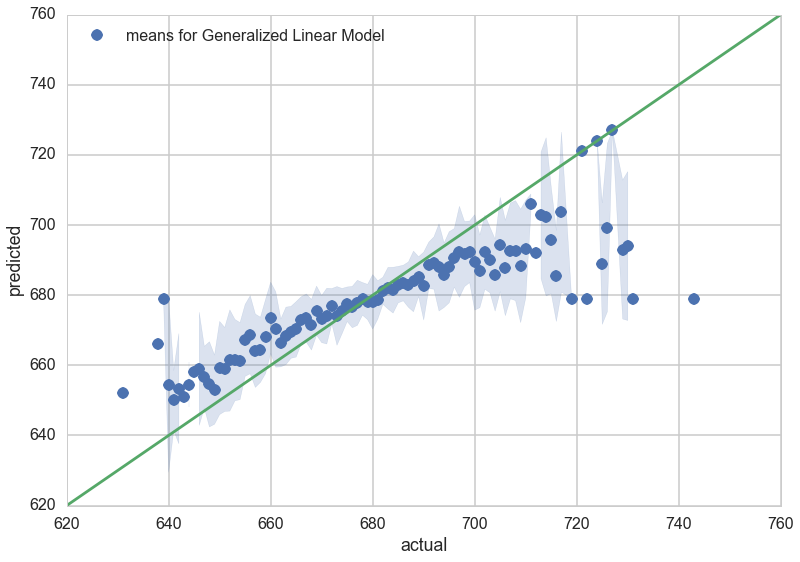

In [15]:
# Plot the predicted scores against the actual ones
df=pd.DataFrame(dict(actual = y_test_score, predicted = y_pred_score))
xp = []
yp = []
fig = plt.figure()
ax = plt.gca()
for k,v in df.groupby('actual'):
    xp.append(k)
    yp.append(v.predicted.mean())
cl, = ax.plot(xp, yp, 'o', label = "means for %s" % "Generalized Linear Model")
c = cl.get_color()
sig = df.groupby('actual').predicted.std().values
ax.fill_between(xp, yp - sig, yp + sig, color = c, alpha = 0.2)
ax.set_xlabel("actual")
ax.set_ylabel("predicted")
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
ax.legend(frameon = False, loc = "upper left")
rmse = get_rmse(y_test_score, y_pred_score)
print "RMSE for %s" % "svm Model", rmse

We see from the this plot that the predicted scores are very close to the 45 degree line, meaning that we are making good predictions using the svm model.

In [16]:
# Then we use survey data as the dependent variable
# Variables
X_train = train[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_train_survey = train['Aca_s_11']
X_validation = validate[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_validation_survey = validate['Aca_s_11']
X_test = test[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
y_test_survey = test['Aca_s_11']

In [106]:
y_train_survey

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 8,
 8,
 7,
 7,
 8,
 7,
 8,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 8,
 9,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 7,
 6,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [17]:
# Now try five different models on the train set and select the best one in terms of RMSE score
# OLS
ols = sm.OLS(y_train_survey, X_train).fit()
y_ols_pred = ols.predict(X_validation)
get_rmse(y_validation_survey, y_ols_pred)

0.39707779312716979

In [18]:
# Lasso regression
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(X_train, y_train_survey)
y_lasso_pred = clf_lasso.predict(X_validation)
get_rmse(y_validation_survey, y_lasso_pred)

0.40009498996096982

In [19]:
# Generalized linear model
from sklearn import linear_model
clf_gen = linear_model.LinearRegression()
clf_gen.fit(X_train, y_train_survey)
y_gen_pred = clf_gen.predict(X_validation)
get_rmse(y_validation_survey, y_gen_pred)

0.38880455363387362

In [20]:
# svm
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train_survey)
y_svm_pred = clf_svm.predict(X_validation)
get_rmse(y_validation_survey, y_svm_pred)

0.18927775756889267

In [21]:
# Linear svm
from sklearn.svm import LinearSVC
from sklearn import grid_search
y_train_survey = [int(x) for x in y_train_survey]
clf_linear_svm = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clf_svm, param_grid=parameters, cv=5)
best.fit(X_train, y_train_survey)
y_linear_svm_pred = best.predict(X_validation)
get_rmse(y_validation_survey, y_linear_svm_pred)

0.66326949131858903

In [22]:
# We see from above that the svm model works best. So we use this model.
# First calculate the predicted scores on the test set using this model
y_pred_survey = clf_svm.predict(X_test)

RMSE for svm Model 0.221105643403


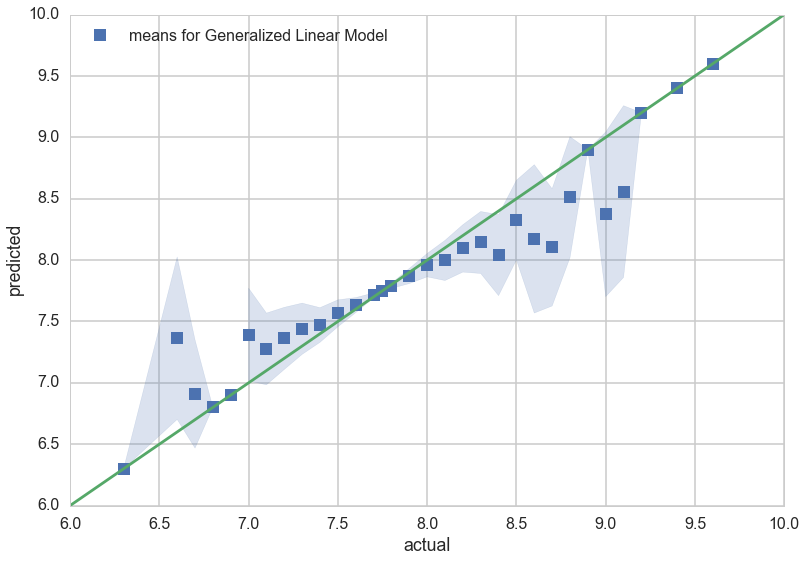

In [23]:
# Plot the predicted scores against the actual ones
df=pd.DataFrame(dict(actual = y_test_survey, predicted = y_pred_survey))
xp = []
yp = []
fig = plt.figure()
ax = plt.gca()
for k,v in df.groupby('actual'):
    xp.append(k)
    yp.append(v.predicted.mean())
cl, = ax.plot(xp, yp, 's', label = "means for %s" % "Generalized Linear Model")
c = cl.get_color()
sig = df.groupby('actual').predicted.std().values
ax.fill_between(xp, yp - sig, yp + sig, color = c, alpha = 0.2)
ax.set_xlabel("actual")
ax.set_ylabel("predicted")
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
ax.legend(frameon = False, loc = "upper left")
rmse = get_rmse(y_test_survey, y_pred_survey)
print "RMSE for %s" % "svm Model", rmse

Here we did the validation and predeiction with the survey data as our dependent variable. Similar to what we got before, the svm model makes the best predictions.

## Significance of coefficients:

In [26]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Aca_s_11   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.269e+04
Date:                Sun, 06 Dec 2015   Prob (F-statistic):               0.00
Time:                        09:29:10   Log-Likelihood:                -1229.1
No. Observations:                2212   AIC:                             2474.
Df Residuals:                    2204   BIC:                             2520.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Funding             -2.432e-08   7.96e-09     -3.056      0.002     -3.99e-08 -8.72e-09
Average_Class_Size      0.0073      0.002      3.585      0.000         0.003     0.011
Avg_No_Crim_N           0.0199      0.011      1.816      0.070        -0.002     0.041
Female_Percentage       0.8993      0.165      5.457      0.000         0.576     1.222
Asian_Percentage        7.1681      0.108     66.518      0.000         6.957     7.379
Black_Percentage        7.0852      0.096     73.565      0.000         6.896     7.274
Hispanic_Percentage     7.2600      0.095     76.512      0.000         7.074     7.446
White_Percentage        7.6044      0.107     71.061      0.000         7.395     7.814
==============================================================================
Omnibus:                      255.282   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.143
Skew:                           0.631   Prob(JB):                    1.01e-149
Kurtosis:                       5.419   Cond. No.                     1.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

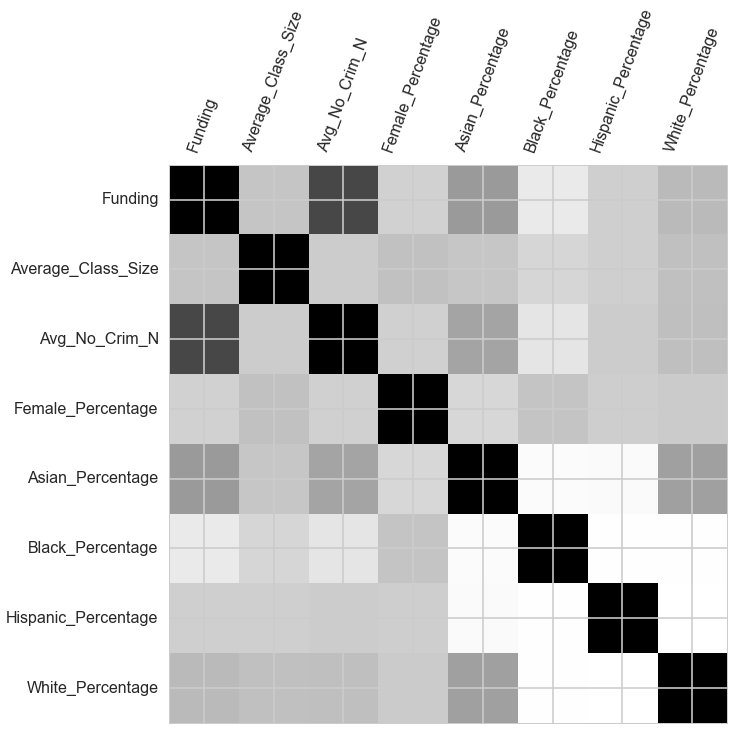

In [29]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(X_train)

In [37]:
X_train.corr()

,Funding,Average_Class_Size,Avg_No_Crim_N,Female_Percentage,Asian_Percentage,Black_Percentage,Hispanic_Percentage,White_Percentage
Funding,1.000000,0.041081,0.680846,-0.035353,0.255625,-0.219038,-0.017187,0.112043
Average_Class_Size,0.041081,1.000000,-0.004231,0.071682,0.039906,-0.065182,-0.018000,0.079421
Avg_No_Crim_N,0.680846,-0.004231,1.000000,-0.031184,0.210816,-0.183351,-0.003984,0.080532
Female_Percentage,-0.035353,0.071682,-0.031184,1.000000,-0.068284,0.050423,-0.011181,0.001553
Asian_Percentage,0.255625,0.039906,0.210816,-0.068284,1.000000,-0.401084,-0.389680,0.231850
Black_Percentage,-0.219038,-0.065182,-0.183351,0.050423,-0.401084,1.000000,-0.429085,-0.434682
Hispanic_Percentage,-0.017187,-0.018000,-0.003984,-0.011181,-0.389680,-0.429085,1.000000,-0.445199
White_Percentage,0.112043,0.079421,0.080532,0.001553,0.231850,-0.434682,-0.445199,1.000000


We see that Number of crimes is correlated with funding, so need to take one variable out of the equation. We took out number of crimes. 

In [32]:
## question -- do we have to redue all the variables taking out number of crimes? 
X_train2 = train[['Funding', 'Average_Class_Size', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
X_validation = validate[['Funding', 'Average_Class_Size', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'White_Percentage']]
ols = sm.OLS(y_train_score, X_train2).fit()
y_ols_pred = ols.predict(X_validation)
get_rmse(y_validation_score, y_ols_pred)

15.341405123692631

In [38]:
from sklearn import linear_model
import statsmodels.formula.api as sm
ols.summary()
score_model = sm.ols("Mean_Scale_Score ~ np.log(Funding) + Average_Class_Size + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage", data=mergedf, missing='drop').fit()
print score_model.summary()

                            OLS Regression Results                            
Dep. Variable:       Mean_Scale_Score   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     748.4
Date:                Sun, 06 Dec 2015   Prob (F-statistic):               0.00
Time:                        09:53:57   Log-Likelihood:                -19314.
No. Observations:                4929   AIC:                         3.864e+04
Df Residuals:                    4921   BIC:                         3.870e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             680.8176    

In [39]:
score_model.params

Intercept              680.817578
np.log(Funding)          1.292399
Average_Class_Size       0.163283
Female_Percentage       45.211862
Asian_Percentage       -15.467957
Black_Percentage       -57.444181
Hispanic_Percentage    -59.191231
White_Percentage       -15.632944
dtype: float64

In [49]:
X_train

,Funding,Average_Class_Size,Avg_No_Crim_N,Female_Percentage,Asian_Percentage,Black_Percentage,Hispanic_Percentage,White_Percentage
4523,4045360,21.780762,1.76000,0.484,0.011,0.949,0.034,0.005
4498,3683628,21.780762,1.76000,0.524,0.012,0.862,0.096,0.029
1167,3472325,24.500000,1.76000,0.513,0.013,0.027,0.937,0.023
1392,2710904,26.500000,1.76000,0.487,0.002,0.072,0.921,0.002
4047,5868227,21.780762,3.56000,0.468,0.293,0.019,0.266,0.418
2838,1245865,21.780762,2.44093,0.459,0.000,0.832,0.163,0.005
1985,4164533,21.780762,2.44093,0.464,0.006,0.474,0.521,0.000
4620,3113621,21.780762,1.09000,0.478,0.039,0.417,0.459,0.080
1621,1730436,23.600000,2.44093,0.540,0.004,0.331,0.647,0.000
891,1792398,7.000000,2.44093,0.447,0.030,0.421,0.538,0.005


Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


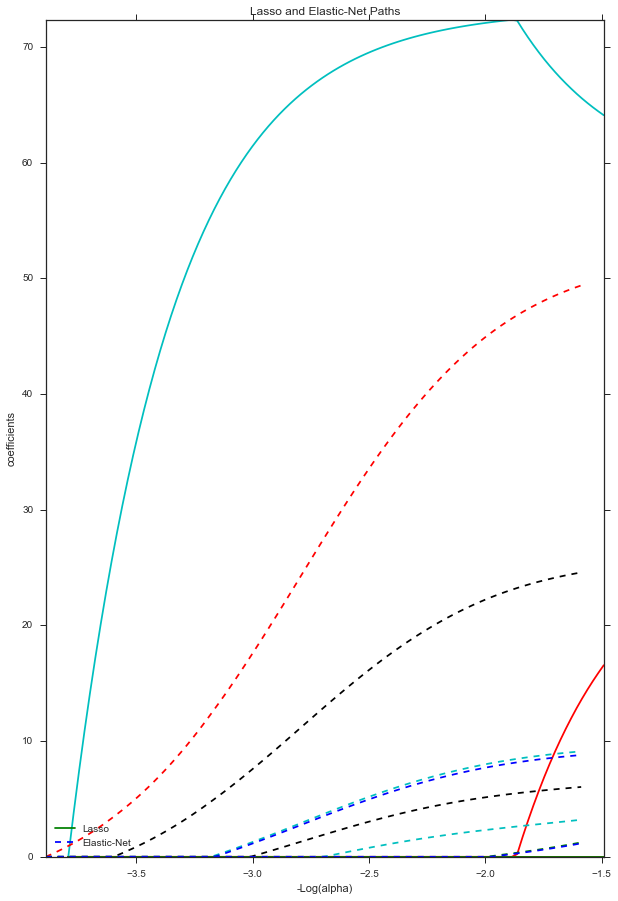

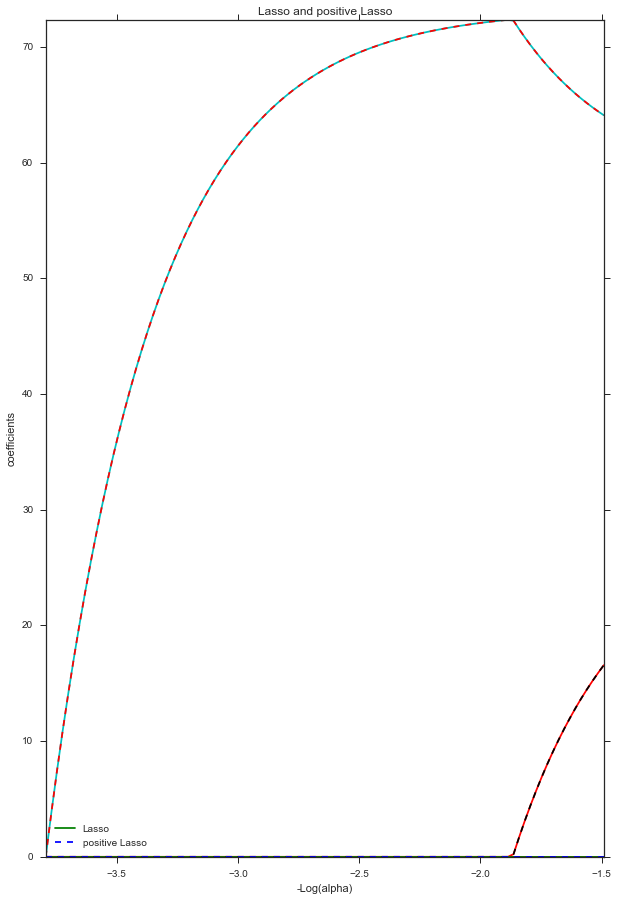

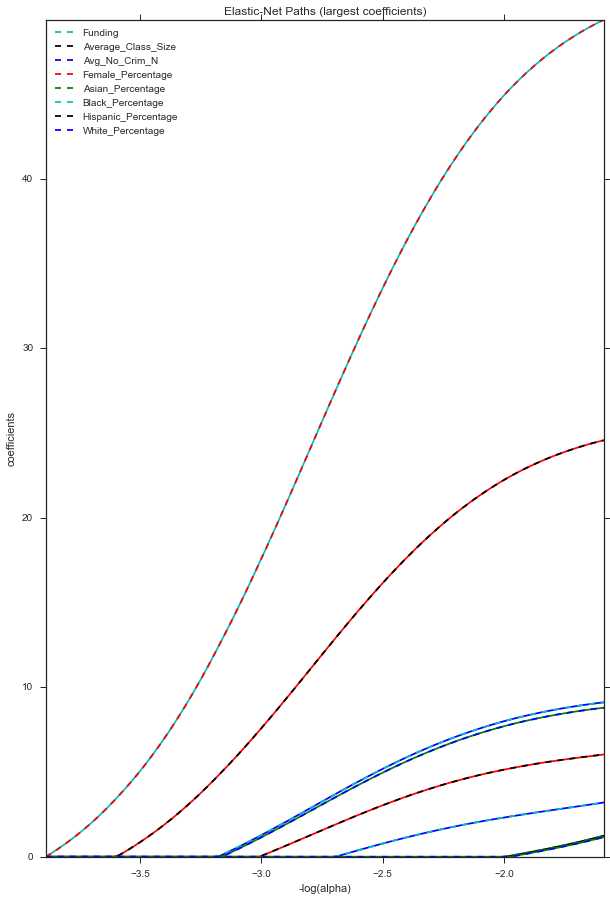

In [96]:
# X = X_train[X_train.columns]
y = y_train_score.values.astype(np.double)
X = X_train.values.astype(np.double)
X /= X.std(axis=0)

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients)')
plt.legend(l2, list(X_train.columns.values), loc='upper left')

plt.show()

From the chart you can see the first variable to enter the model is ...

In [56]:
list(X_train.columns.values)

['Funding',
 'Average_Class_Size',
 'Avg_No_Crim_N',
 'Female_Percentage',
 'Asian_Percentage',
 'Black_Percentage',
 'Hispanic_Percentage',
 'White_Percentage']

Computing regularization path using the lasso...
Computing regularization path using the elastic net...


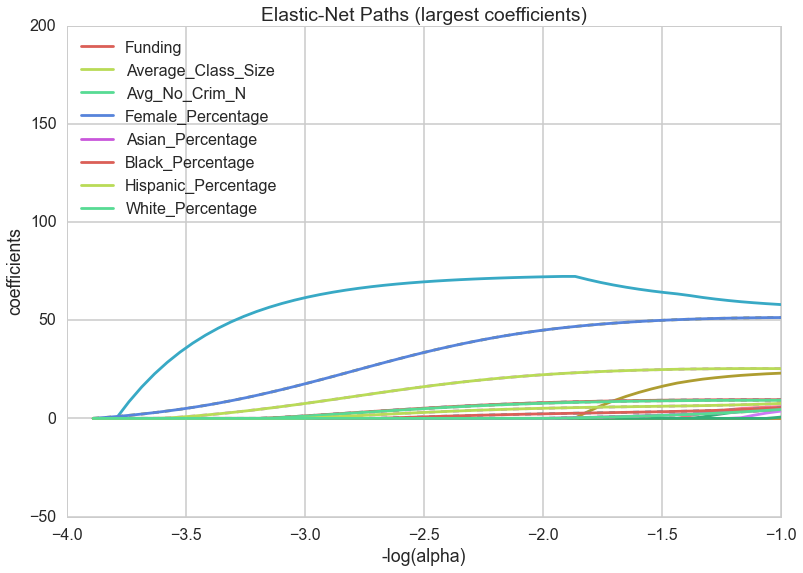

In [66]:
from sklearn.linear_model import lasso_path, enet_path
eps = 5e-6  # the smaller it is the longer is the path

# X = mergedf["Mean_Scale_Score"]

# print X
# y = mergedf["Avg_No_Crim_N", "Female_Percentage", "Asian_Percentage", "Black_Percentage", "Hispanic_Percentage"]
# print y
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

col = sns.color_palette("husl", 5)

# make the lasso path
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlim([-1, 10])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')

col = sns.color_palette("hls",5)

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T[: ])
plt.xlim([-4, -1])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients)')
plt.legend(l2, list(X_train.columns.values), loc='upper left')

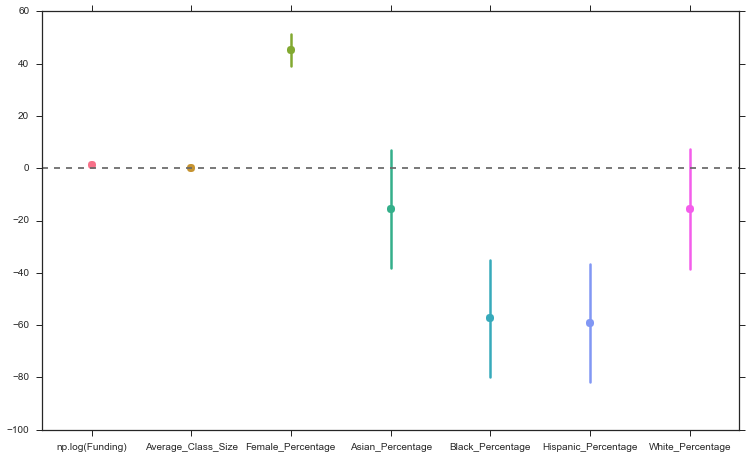

In [68]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Mean_Scale_Score ~ np.log(Funding) + Average_Class_Size  + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage"
reg_results = sm.ols(f, data=mergedf).fit().summary()

sns.set(style="ticks") 
mpl.rc("figure", figsize=(10, 15))

sns.coefplot(f,mergedf,intercept=False);

In [103]:
y_train_score

4523    672
4498    671
1167    675
1392    649
4047    694
2838    673
1985    664
4620    663
1621    665
891     652
4611    683
1527    658
951     644
1590    673
4921    673
4752    688
1505    659
3964    693
1107    693
3096    663
4143    692
2444    688
254     693
991     652
3196    701
3991    706
2168    668
3127    656
969     664
4065    692
       ... 
3138    681
1812    658
1838    685
4031    701
1799    674
1940    661
4428    695
4262    677
4330    696
1683    666
3814    654
3078    703
2393    674
4059    709
270     679
3605    683
3404    672
4356    685
1573    666
1183    661
4623    676
4319    676
4388    700
445     654
906     689
2243    649
4579    698
2251    664
4785    697
438     654
Name: Mean_Scale_Score, dtype: int64

In [107]:
from sklearn.linear_model import lasso_path, enet_path
eps = 5e-6  # the smaller it is the longer is the path

##why can't I change this to survey?!?!
y = y_train_survey.values.astype(np.double)
X = X_train.values.astype(np.double)
X /= X.std(axis=0)
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

col = sns.color_palette("husl", 5)

# make the lasso path
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlim([-1, 10])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')

col = sns.color_palette("hls",5)

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T[: ])
plt.xlim([-4, -1])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients)')
plt.legend(l2, list(X_train.columns.values), loc='upper left')

AttributeError: 'list' object has no attribute 'values'

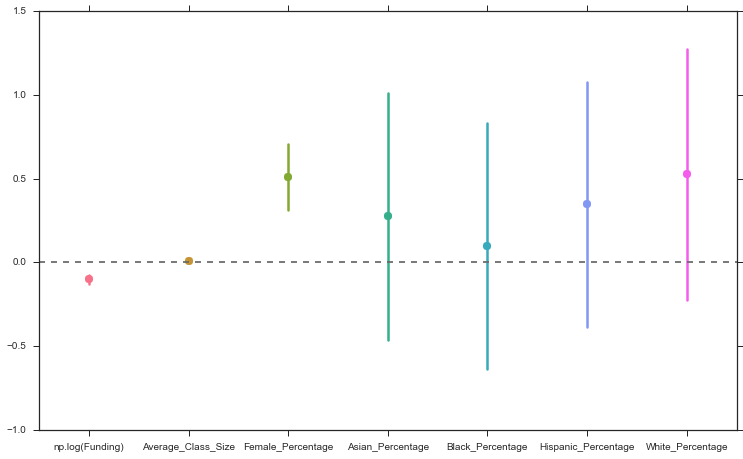

In [92]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Aca_s_11~ np.log(Funding) + Average_Class_Size  + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage"
reg_results = sm.ols(f, data=mergedf).fit().summary()

sns.set(style="ticks") 
mpl.rc("figure", figsize=(10, 15))

sns.coefplot(f,mergedf,intercept=False);

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[  6.76529022e+02   3.09236054e+06]
 [  6.87135876e+02   6.58148432e+06]] [[  2.94535391e+02   1.51444058e+06]
 [  1.51444058e+06   1.21074512e+12]]


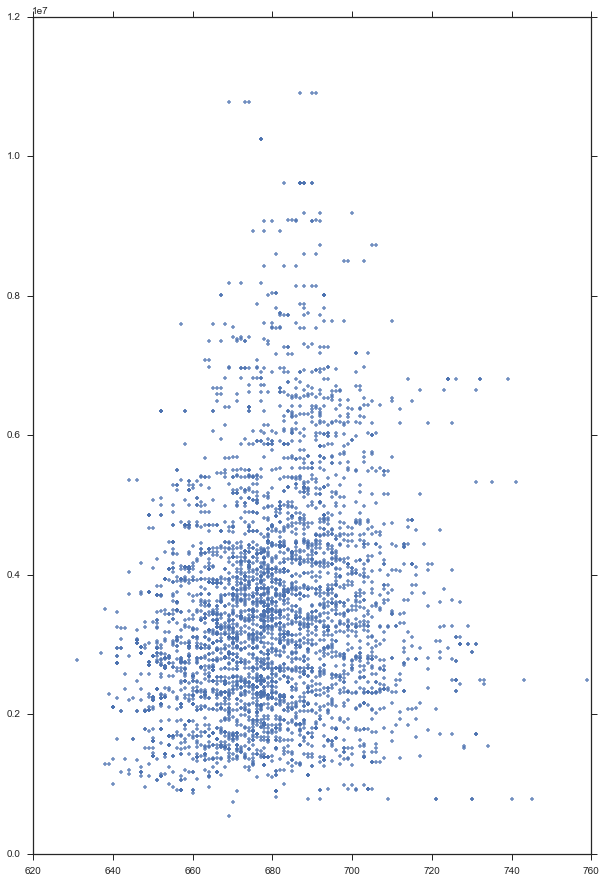

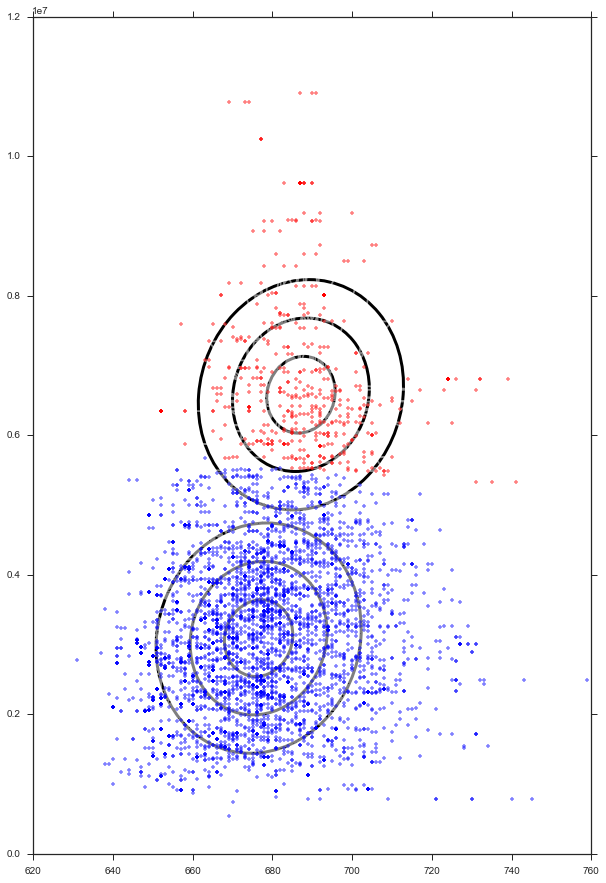

In [85]:
plt.plot(mergedf.Mean_Scale_Score, (mergedf.Funding), '.', alpha=0.8);
Xall=mergedf[['Mean_Scale_Score', 'Funding']].values
from sklearn.mixture import GMM
n_clusters=2
clfgmm = GMM(n_components=n_clusters, covariance_type="tied")
clfgmm.fit(Xall)
print clfgmm
gmm_means=clfgmm.means_
gmm_covar=clfgmm.covars_
print gmm_means, gmm_covar
from scipy import linalg

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell.set_clip_box(splot.bbox)
    ell1 = mpl.patches.Ellipse(mean, 1 * v[0] ** 0.5, 1 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell1.set_clip_box(splot.bbox)
    ell3 = mpl.patches.Ellipse(mean, 3 * v[0] ** 0.5, 3 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell3.set_clip_box(splot.bbox)
    #ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell3)
plt.figure()
ax=plt.gca()
plot_ellipse(ax, gmm_means[0], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[1], gmm_covar, 'k')
gmm_labels=clfgmm.predict(Xall)
for k, col in zip(range(n_clusters), ['blue','red']):
    my_members = gmm_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.5)